# Introduction

Muhammad Bintang Ramadhan  
Datascience Batch08

Data Informasi  
Setiap baris mewakili customer, setiap kolom berisikan atribut customer.  
  
* Pelanggan yang pergi dalam sebulan terakhir (kolomnya disebut Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

Objective
* Membuat prediksi Churn atau tidak Churn menggunakan model ANN

# Import Library

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

#Preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Modelling


#Evaluasi Model
from sklearn import metrics
from sklearn.metrics import classification_report

# Import Data

In [2]:
# Load data menggunakan pandas
pd.set_option('display.max_columns', 50) #Untuk memunculkan seluruh column
df_ori = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') #Load data Telco Customer Churn
df = df_ori.copy() #menduplikasi data original
df.head() #memunculkan 5 data teratas

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#mengubah setiap kolom dataset menjadi lowercase
df.columns= df.columns.str.lower()
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Exploratory Data Analyst (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 




*   Terdapat 7043 data dari 21 columns (feature)
*   Dataset memiliki tipe data float(1), integer(2), object(18)

*   Dataframe Tidak memiliki Missing Value





In [5]:
#Mengecek Jumlah dan berapa persen Missing Value dari tiap Fitur
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /len(df) *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %


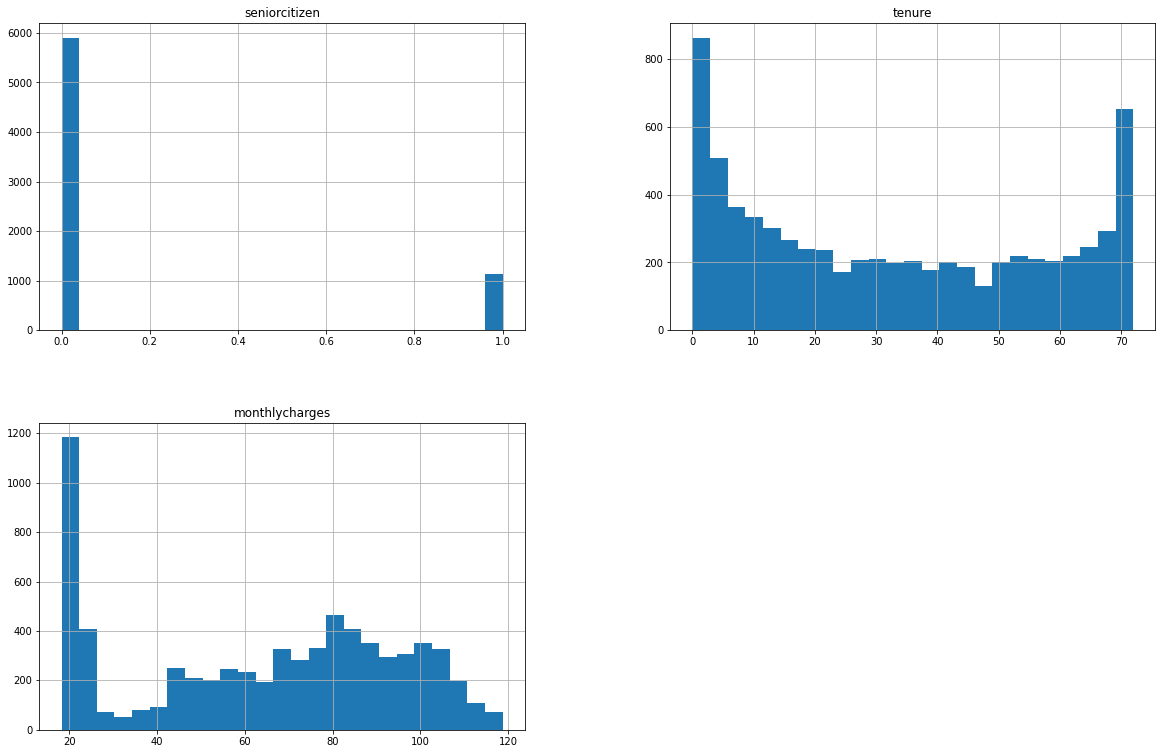

In [6]:
# cek distribusi data numerik sekilas
df.hist(bins=25, figsize=(20,13))
plt.show()

* seniorcitizen : Tipe data categorical tetapi menggunakan integer, untuk memudahkan pemisaha numerical data dan categorical data, maka akan saya rubah menjadi dtype object

In [7]:
df['seniorcitizen'] = df['seniorcitizen'].replace({0:'No', 1:'Yes'})

In [8]:
# cek unique value
for column in df.columns:
    print('Feature {} Unique Values: {}'.format(column, df[column].unique()))

Feature customerid Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Feature gender Unique Values: ['Female' 'Male']
Feature seniorcitizen Unique Values: ['No' 'Yes']
Feature partner Unique Values: ['Yes' 'No']
Feature dependents Unique Values: ['No' 'Yes']
Feature tenure Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Feature phoneservice Unique Values: ['No' 'Yes']
Feature multiplelines Unique Values: ['No phone service' 'No' 'Yes']
Feature internetservice Unique Values: ['DSL' 'Fiber optic' 'No']
Feature onlinesecurity Unique Values: ['No' 'Yes' 'No internet service']
Feature onlinebackup Unique Values: ['Yes' 'No' 'No internet service']
Feature deviceprotection Unique Values: ['No' 'Yes' 'No internet service']
Feature techsupport Unique Values: 

* totalcharges seharusnya tipe data numerical, maka akan dilakukan perubahan tipe data pada totalcharges

In [9]:
#mengubah type data total charges dari 'object' menjadi 'float'
df['totalcharges'] = pd.to_numeric(df.totalcharges, errors='coerce')
df['totalcharges'].dtype

dtype('float64')

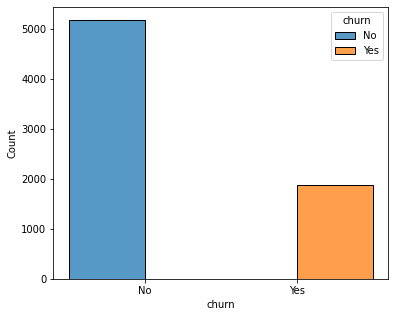

In [10]:
plt.figure(figsize=(6,5))
sns.histplot(df, x=df['churn'], hue=df['churn'], multiple='dodge')
plt.show()

* Variable target (Churn) tidak  balance, maka harus dilakukan SMOTE dalam training data  

In [11]:
# Helper Function
def cat_vis(col):
    # d= pd.DataFrame(data.groupby(col).mean()['churn']).reset_index()
    fig , axes = plt.subplots(1,2, figsize=(15,5))
    axes[0].pie(df[col].value_counts(), labels = df[col].unique(), autopct='%.00f%%')
    sns.countplot(ax= axes[1], data = df, x= col, hue='churn')
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 30)
    # sns.barplot(ax= axes[2],data = d, x= col, y= 'churn')
    # axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 30)
    # fig.suptitle(f'Exploring "{col}"')
    
def num_vis(col):
    sns.histplot(data=df, x= col, hue = 'churn')
    plt.show()

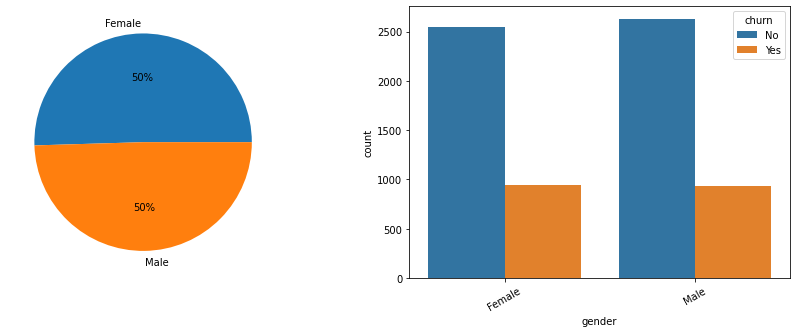

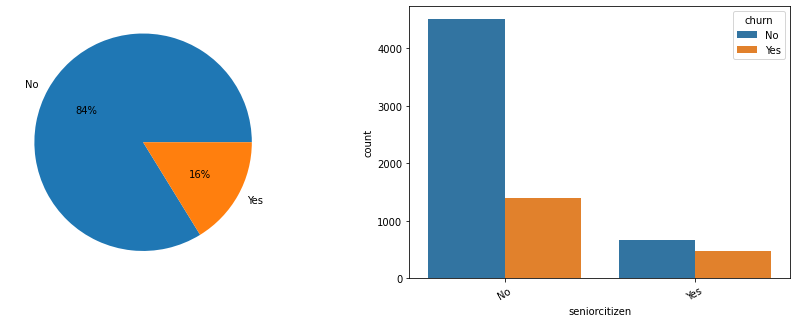

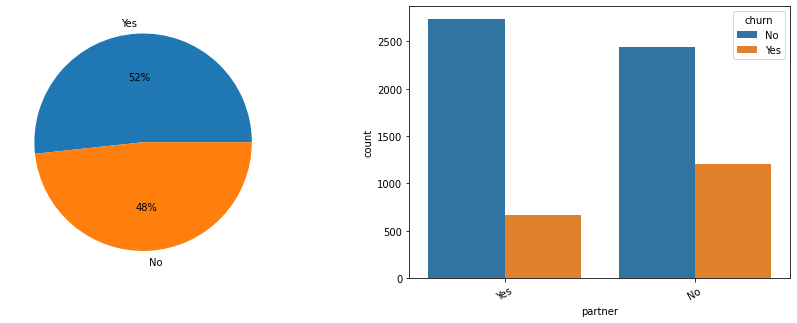

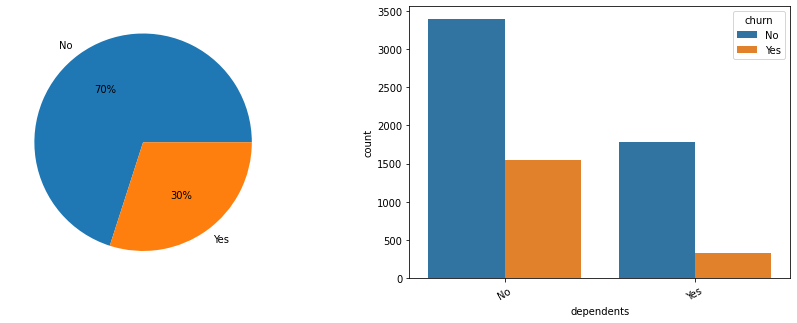

In [12]:
demographic = ['gender', 'seniorcitizen', 'partner', 'dependents']

for col in demographic:
    cat_vis(col)

* Gender memiliki jumlah yang sama, artinya tidak memiliki perbedaan dalam melakukan keputusan Churn atau tidak Churn, saya pikir fitur ini menjadi tidak penting untuk pemodelan.  
* Senior Citizen : senior citizen hanya 16% berlangganan, sedangkan yang bukan senior citizen 84%
* Partner : pelanggan yang memiliki partner lebih sedikit melakukan churn dibandingkan pelanggan yang tidak memiliki pasangan
* dependents : pelanggan yang tidak memiliki tanggungan lebih sedikit melakukan churn dibandingkan dengan pelanggan yang memiliki tanggungan

Dari fitur-fitur demographic pelanggan ini saya rasa tidak bisa menyimpulkan sesuatu yang jelas dalam pengaruhnya terhadap Churn atau tidak Churn.

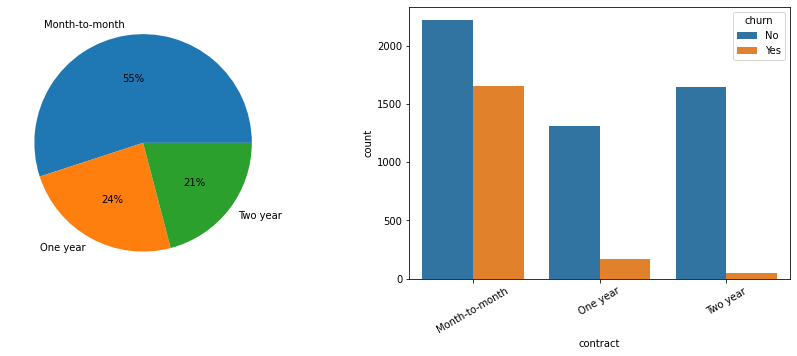

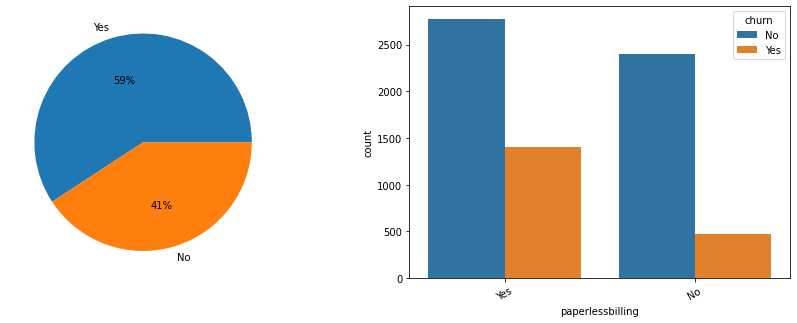

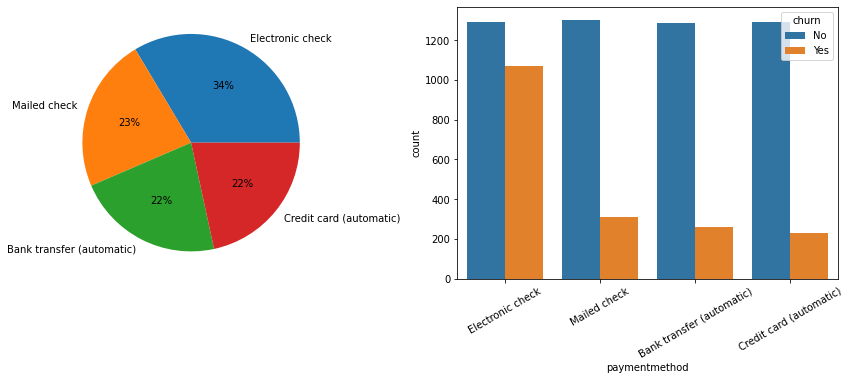

In [13]:
account_info_cat = ['contract', 'paperlessbilling', 'paymentmethod']

for col in account_info_cat:
    cat_vis(col)

* Contract : pelanggan dengan contract month-to-month paling banyak melakukan churn
* Paperless billing : pelanggan yang menggunakan paperless billing lebih banyak melakukan churn
* Paymenth method : pelanggan yang menggunakan Electronic Check cenderung lebih banyak melakukan churn

Menurut saya, jika ditarik kesimpulan bahwa para pelanggan yang masih baru menggunakan layanan dari perusahaan tersebut cenderung melakukan churn, artinya perusahaan harus memberikan layanan yang terbaik kepada para pelanggan baru. Kenapa saya menarik kesimpulan bahwa yang melakukan churn adalah pelanggan-pelanggan baru, karna pelanggan-pelanggan tersebut hanya memiliki contract month-to-mont artinya jangka pendek, menggunakan electronic check yang artinya hanya melakukan pembayaran ketika ada tagihan tidak seperti pelanggan yang menggunakan automatic payment.

In [14]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

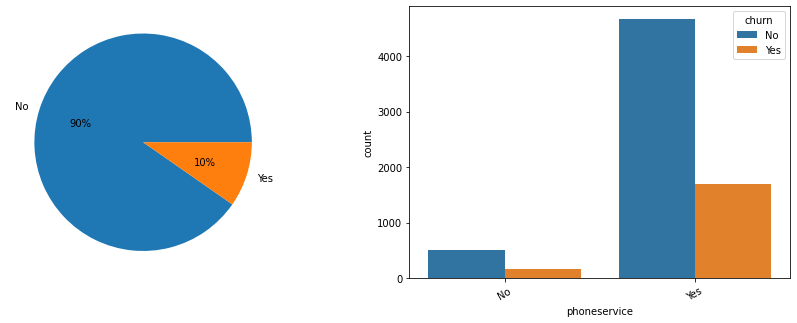

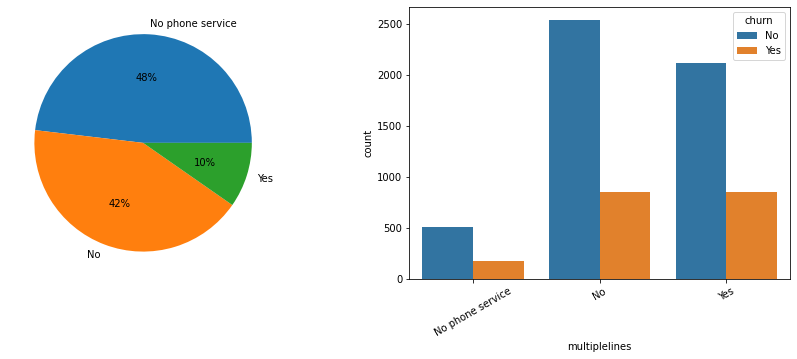

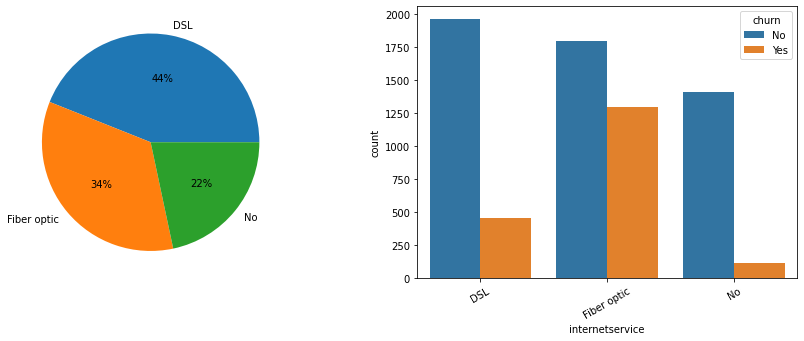

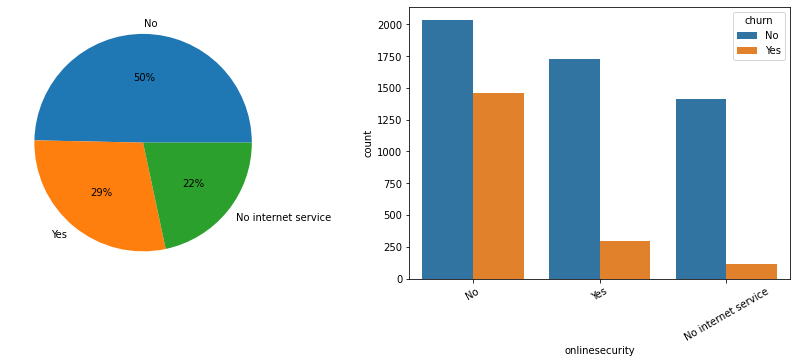

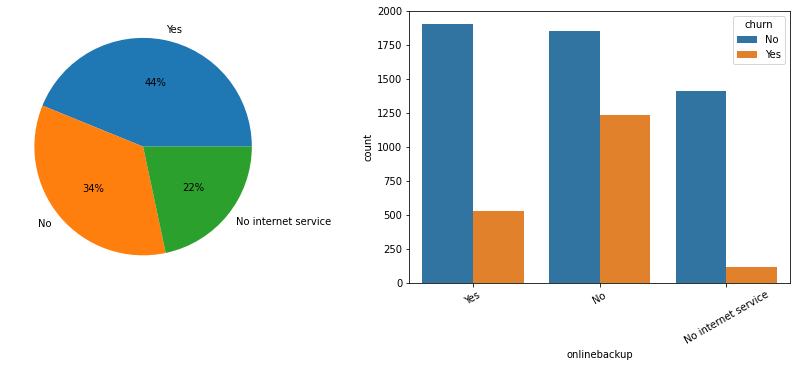

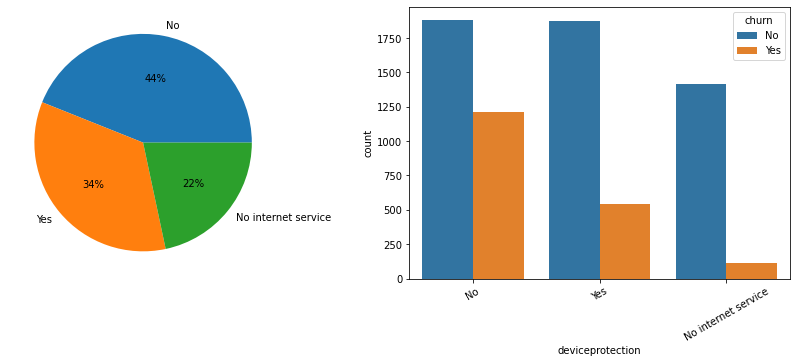

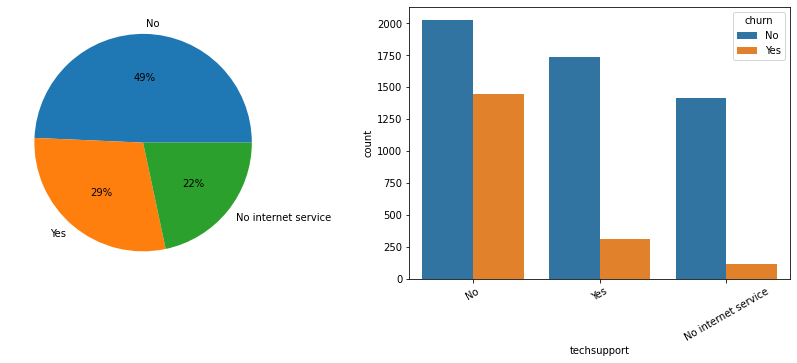

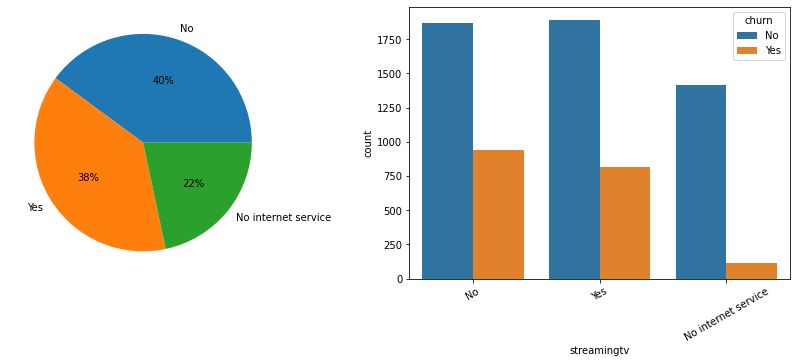

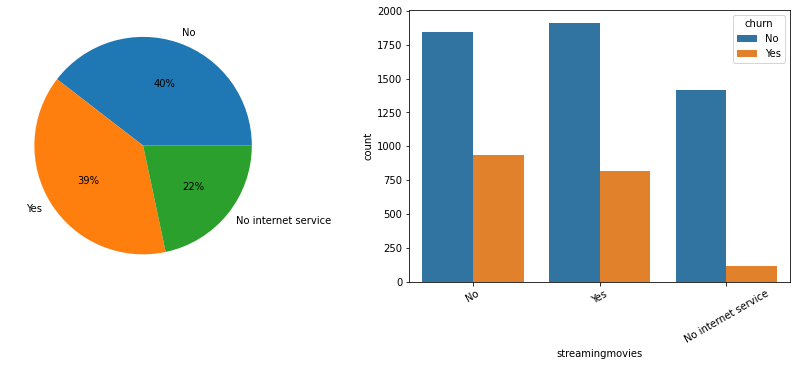

In [15]:
services = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for col in services:
    cat_vis(col)

* Dari keseluruhan pelanggan yang tidak banyak menggunakan layanan produk cenderung akan melakukan churn, sedangkan pelanggan yang banyak menggunakan layanan produk akan bertahan berlangganan.

Saya menyimpulkan bahwa pelanggan-pelanggan yang menggunakan banyak layanan cenderung akan bertahan berlangganan dibandingkan dengan pelanggan yang hanya berlangganan satu produk saja. Itu dikarenakan mereka masih mencoba-coba layanan dari perusahaan tersebut, sedangkan yang telah menggunakan banyaklayanan bertahan lama karena sudah merasa puas dengan layanan-layanan perusahaan tersebut.

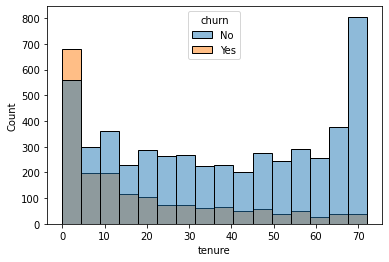

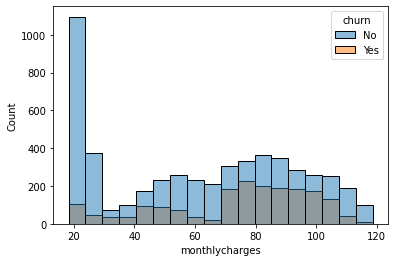

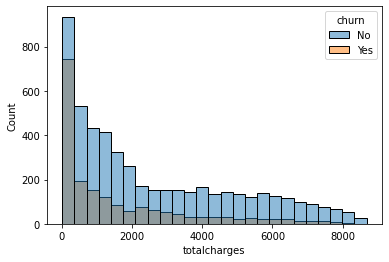

In [16]:
num = ['tenure', 'monthlycharges', 'totalcharges']

for col in num:
  num_vis(col)

* Tenure : Pelanggan yang baru berlangganan (low tenure) cenderung akan melakukan churn
* Monthly Charges: Pelanggan yang memiliki monthly charged cukup tinggi (range 70-100 $) cenderung melakukan churn

Dari kesimpulan-kesimpulan sebelumnya argumen tersebut bisa divalidasi dari melihat hasil plot tenure, bahwa yang melakukan churn memang kebanyakan dari mereka yang baru berlangganan.

Jadi kesimpulan analisis ini bahwa perusahaan harus memberikan layanan sebaik-baiknya terhadap para pelanggan baru. Agar mereka merasa puas dengan layanannya sehingga mereka akan menjadi pelanggan loyal pada perusahaan tersebut.

# Data Preprocessing

### Get Data Inference

In [17]:
#Mengambil 10 data dari dataset untuk dijadikan data inference / yang dijadikan objective data
inf = df.sample(10, random_state=8)
inf.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1164,4782-OSFXZ,Female,Yes,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),82.70,5831.20,No
5179,9048-JVYVF,Male,No,No,No,3,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes
2129,9787-XVQIU,Male,No,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.30,75.30,Yes
1963,7967-HYCDE,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40,No
6478,9330-VOFSZ,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,No


In [18]:
# Menghapus data Inference dari dalam dataset
df = df.drop(inf.index)

In [19]:
# Reset Index untuk Data_train_test dan data for inference
df.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

## Feature Selection

In [20]:
cat_feat = df.select_dtypes(include='object')
cat_feat.drop(columns=['customerid', 'churn'], inplace=True)

num_feat = df.select_dtypes(include=np.number)

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.churn)

In [23]:
corr = cat_feat.apply(compute_mutual_information).sort_values(ascending=False)

In [24]:
print(corr)

contract            0.098412
onlinesecurity      0.064644
techsupport         0.063132
internetservice     0.055663
onlinebackup        0.046821
paymentmethod       0.044473
deviceprotection    0.043932
streamingmovies     0.032032
streamingtv         0.031970
paperlessbilling    0.019291
dependents          0.014555
partner             0.011366
seniorcitizen       0.010642
multiplelines       0.000797
phoneservice        0.000068
gender              0.000042
dtype: float64


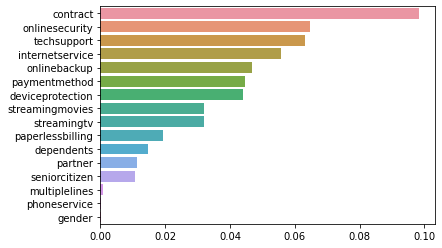

In [25]:
sns.barplot(x=corr.values, y= corr.index);

* Sangat masuk akal jikan gender, phoneservice dan multiplelines sangat rendah korelasi terhadap target, Karena jika melihat EDA diatas tadi beberapa fitur tersebut tidak memiliki perbedaan signifikan terhadap target.

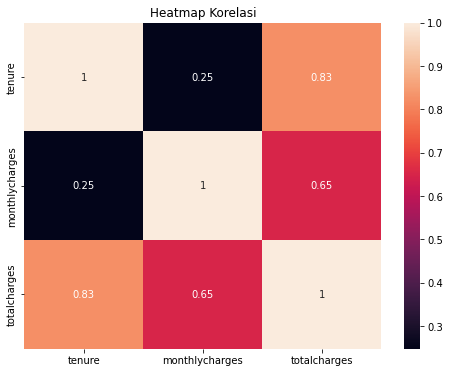

In [26]:
plt.figure(figsize=(8,6)) #Ukuran Plot
sns.heatmap(num_feat.corr(), annot=True) #Menampilkan korelasi dari num_feat
plt.title('Heatmap Korelasi') #Title plot
plt.show()

In [27]:
df.drop(columns=['customerid', 'gender', 'multiplelines', 'phoneservice'], inplace=True)

## Split Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Splitting Dataset menggunakan sklearn train_test_split

# Membagi untuk data train 90% dan test 10%
#train-test data
train, test = train_test_split(df, test_size=0.1, random_state=8)

# Membagi untuk data train 90% dan validation 20%
#train-val data
train, val = train_test_split(train, test_size=0.2, random_state=8)

In [30]:
print(train.shape)
print(val.shape)
print(test.shape)

(5063, 17)
(1266, 17)
(704, 17)


## Handling Missing Value

In [31]:
#Mengecek Jumlah dan berapa persen Missing Value dari tiap Fitur
mis = train.isnull().sum() #Jumlah Missing Value
misperc = train.isnull().sum() /len(train) *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %
totalcharges,10,0.0


In [32]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

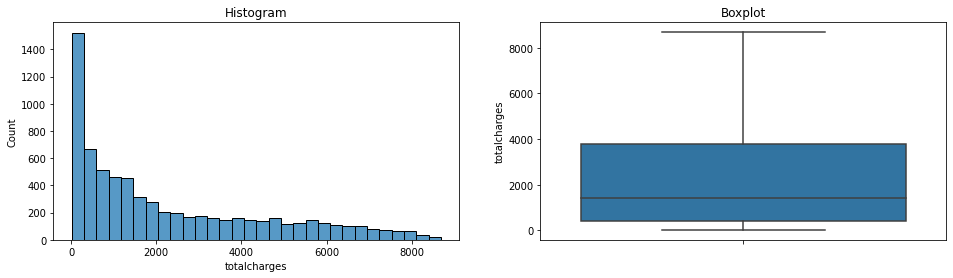

Nilai Skew :  0.9541127254674028


In [33]:
identify_plots(df, 'totalcharges')

#cek distribusi data
print('Nilai Skew : ', train['totalcharges'].skew()) #Nilai skewness dari feature totalcharges

In [34]:
#mencari nilai median
median = train['totalcharges'].median()
median

1391.15

In [35]:
# #handling missing value median train.totalcharges
# train['totalcharges'] = train['totalcharges'].fillna(median)
# val['totalcharges'] = val['totalcharges'].fillna(median)
# test['totalcharges'] = test['totalcharges'].fillna(median)

In [36]:
# #Mengecek Jumlah dan berapa persen Missing Value dari tiap Fitur
# mis = train.isnull().sum() #Jumlah Missing Value
# misperc = train.isnull().sum() /len(train) *100 #Berapa persen Missing Value
# misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
# misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

## Handling Outliers

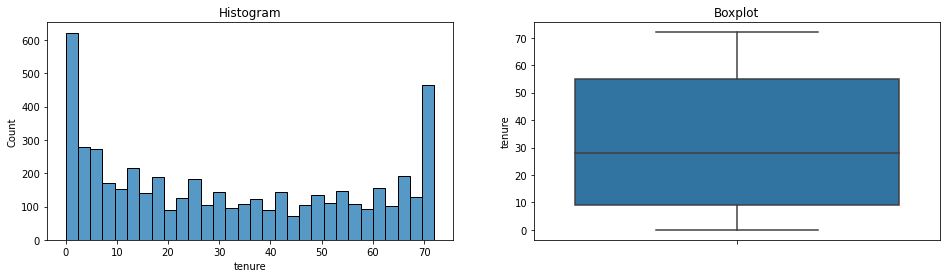

Nilai Skew :  0.25388375646641115



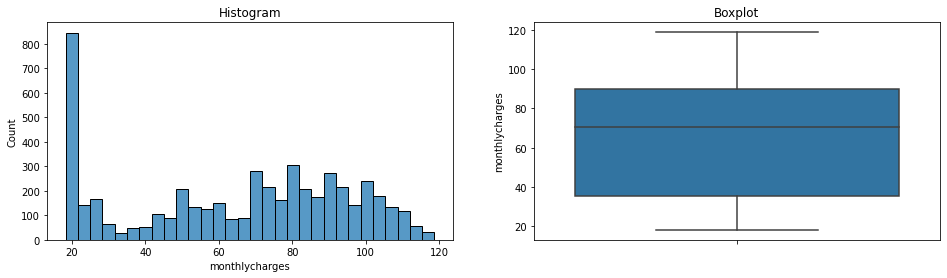

Nilai Skew :  -0.23214750373566762



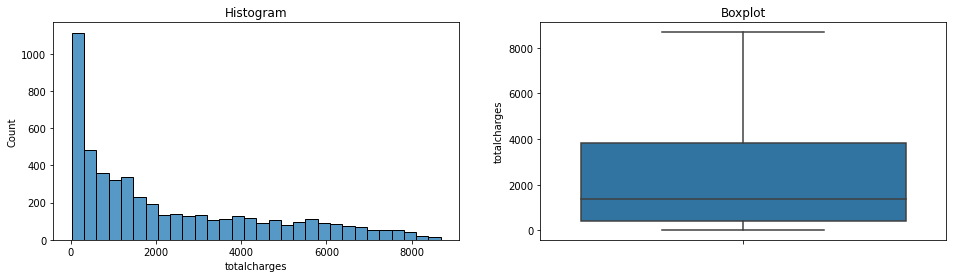

Nilai Skew :  0.9541127254674028



In [37]:
for var in train.select_dtypes(np.number): #Looping semua data dtrain Numerik
    identify_plots(train, var)
    print('Nilai Skew : ', train[var].skew()) #Nilai skewness dari tiap data numerik 
    print()

### Outliers Detection

In [38]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah skew
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas skew

    return upper_boundary_skew, lower_boundary_skew

In [39]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan mean +- 3 * standard deviasi.
def find_normal_boundaries(df, variable):
    upper_boundary_normal = df[variable].mean() + 3 * df[variable].std() # batas atas normal
    lower_boundary_normal = df[variable].mean() - 3 * df[variable].std() # batas bawah normal

    return upper_boundary_normal, lower_boundary_normal

#### Outliers Detection for Normal Distribution

In [40]:
# Melihat batas atas dan batas bawah variable tenure
tenure_upper_boundary_normal, tenure_lower_boundary_normal = find_normal_boundaries(train, 'tenure')
tenure_upper_boundary_normal, tenure_lower_boundary_normal

(105.72234437292477, -41.45372892753665)

In [41]:
# Melihat jumlah dan percent data outliers variable tenure
print('Jumlah data tenure diatas 105   : {}'.format(len(train[train['tenure'] > tenure_upper_boundary_normal])))
print('Jumlah data tenure dibawah -41   : {}'.format(len(train[train['tenure'] < tenure_lower_boundary_normal])))
print()
print('% Jumlah data tenure diatas 105 : {}'.format(len(train[train['tenure'] > tenure_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data tenure dibawah -41 : {}'.format(len(train[train['tenure'] < tenure_lower_boundary_normal])/len(train) * 100))

Jumlah data tenure diatas 105   : 0
Jumlah data tenure dibawah -41   : 0

% Jumlah data tenure diatas 105 : 0.0
% Jumlah data tenure dibawah -41 : 0.0


In [42]:
# Melihat batas atas dan batas bawah variable monthlycharges
monthlycharges_upper_boundary_normal, monthlycharges_lower_boundary_normal = find_normal_boundaries(train, 'monthlycharges')
monthlycharges_upper_boundary_normal, monthlycharges_lower_boundary_normal

(155.00898695620643, -25.280861338983954)

In [43]:
# Melihat jumlah dan percent data outliers variable monthlycharges
print('Jumlah data monthlycharges diatas 155   : {}'.format(len(train[train['monthlycharges'] > monthlycharges_upper_boundary_normal])))
print('Jumlah data monthlycharges dibawah -25   : {}'.format(len(train[train['monthlycharges'] < monthlycharges_lower_boundary_normal])))
print()
print('% Jumlah data monthlycharges diatas 155 : {}'.format(len(train[train['monthlycharges'] > monthlycharges_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data monthlycharges dibawah -25 : {}'.format(len(train[train['monthlycharges'] < monthlycharges_lower_boundary_normal])/len(train) * 100))

Jumlah data monthlycharges diatas 155   : 0
Jumlah data monthlycharges dibawah -25   : 0

% Jumlah data monthlycharges diatas 155 : 0.0
% Jumlah data monthlycharges dibawah -25 : 0.0


#### Outliers Detection for Skewness Distribution

In [44]:
# Melihat batas atas dan batas bawah variable totalcharges
totalcharges_upper_boundary_skew, totalcharges_lower_boundary_skew = find_skewed_boundaries(train, 'totalcharges', 1.5)
totalcharges_upper_boundary_skew, totalcharges_lower_boundary_skew

(8942.3, -4741.7)

In [45]:
# Melihat jumlah dan percent data outliers variable totalcharges
print('Jumlah data totalcharges diatas 8933   : {}'.format(len(train[train['totalcharges'] > totalcharges_upper_boundary_skew])))
print('% Jumlah data totalcharges diatas 8933 : {}'.format(len(train[train['totalcharges'] > totalcharges_upper_boundary_skew])/len(train) * 100))

Jumlah data totalcharges diatas 8933   : 0
% Jumlah data totalcharges diatas 8933 : 0.0


Tidak terdapat Outliers

## define X, y

In [46]:
# Mendefinikan Target

# untuk Train data
X_train = train.drop(columns=['churn']) #Fitur
y_train = train['churn'].replace({'No' : 0, 'Yes' : 1}) #Target

# untuk Val data
X_val = val.drop(columns=['churn']) #Fitur
y_val = val['churn'].replace({'No' : 0, 'Yes' : 1}) #Target

# untuk Test data
X_test = test.drop(columns=['churn']) #Fitur
y_test = test['churn'].replace({'No' : 0, 'Yes' : 1}) #Target

In [47]:
# Get Numerical and Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

num_col, cat_col

(['tenure', 'monthlycharges', 'totalcharges'],
 ['seniorcitizen',
  'partner',
  'dependents',
  'internetservice',
  'onlinesecurity',
  'onlinebackup',
  'deviceprotection',
  'techsupport',
  'streamingtv',
  'streamingmovies',
  'contract',
  'paperlessbilling',
  'paymentmethod'])

In [48]:
# X_train_num = X_train[num_col]
# X_train_cat = X_train[cat_col]

# X_val_num = X_val[num_col] 
# X_val_cat = X_val[cat_col]

# X_test_num = X_test[num_col] 
# X_test_cat = X_test[cat_col]

## Feature Scalling

In [49]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train_num_scaled = scaler.fit_transform(X_train_num)
# X_val_num_scaled = scaler.transform(X_val_num)
# X_test_num_scaled = scaler.transform(X_test_num)

In [50]:
# X_train_num_scaled

## Feature Encoding

In [51]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()

# X_train_cat_encoded = encoder.fit_transform(X_train_cat)
# X_val_cat_encoded = encoder.transform(X_val_cat)
# X_test_cat_encoded = encoder.transform(X_test_cat)

In [52]:
# X_train_cat_encoded

## Concatenate between Numerical Columns and Categorical Columns

In [53]:
# # Concat Data

# X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
# X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_encoded], axis=1)
# X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [54]:
# X_train_final

In [55]:
# X_train_final = pd.DataFrame(X_train_final, columns=[num_col + cat_col])
# X_val_final = pd.DataFrame(X_val_final, columns=[num_col + cat_col])
# X_test_final = pd.DataFrame(X_test_final, columns=[num_col + cat_col])
# X_train.head(2)

## SMOTE

In [56]:
# print(y_train.value_counts())
# print(y_train.value_counts()/len(y_train)*100)

In [57]:
# X_train_final, y_train = SMOTE(sampling_strategy='minority').fit_resample(X_train_final, y_train)
# y_train.value_counts()

## Build Pipeline Preprocessing

In [58]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('scaler', MinMaxScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('encode', OneHotEncoder(handle_unknown='ignore'))]
)

#Membuat Pipeline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

In [59]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['tenure', 'monthlycharges', 'totalcharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['seniorcitizen', 'partner', 'dependents',
                                  'internetservice', 'onlinesecurity',
                                  'onlinebackup', 'deviceprotection',
                                  'techsupport', 'streamingtv',
                            

In [60]:
X_train_final = preprocessor.transform(X_train)
X_val_final = preprocessor.transform(X_val)

In [61]:
X_train_final, y_train = SMOTE(sampling_strategy='minority').fit_resample(X_train_final, y_train)
y_train.value_counts()

0    3701
1    3701
Name: churn, dtype: int64

# Modelling

### Sequential API

In [62]:
X_train_final.shape

(7402, 39)

#### Model sequential 1

In [63]:
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD


# deklarasi model
model = Sequential() 
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)) #pipeline
# train_dataset = train_dataset.shuffle(100).repeat(2).batch(30) #pipeline
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', input_shape=(39,), kernel_initializer=keras.initializers.GlorotUniform()))#hidden layer
model.add(BatchNormalization())
model.add(Dense(5, activation='relu', kernel_initializer=keras.initializers.GlorotUniform()))#hidden layer
model.add(BatchNormalization())
model.add(Dense(3, activation='relu', kernel_initializer=keras.initializers.GlorotUniform()))#hidden layer
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid')) #output layer

In [64]:
# training model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modeltrain = model.fit(X_train_final, y_train, epochs=100, validation_data=(X_val_final, y_val), batch_size=10, verbose=1)

Epoch 1/100
741/741 [==============================] - 18s 13ms/step - loss: 0.5943 - accuracy: 0.7008 - val_loss: 0.5620 - val_accuracy: 0.7204
Epoch 2/100
741/741 [==============================] - 5s 7ms/step - loss: 0.5238 - accuracy: 0.7410 - val_loss: 0.5107 - val_accuracy: 0.7291
Epoch 3/100
741/741 [==============================] - 5s 7ms/step - loss: 0.5122 - accuracy: 0.7503 - val_loss: 0.4964 - val_accuracy: 0.7409
Epoch 4/100
741/741 [==============================] - 4s 6ms/step - loss: 0.5092 - accuracy: 0.7516 - val_loss: 0.5081 - val_accuracy: 0.7385
Epoch 5/100
741/741 [==============================] - 4s 6ms/step - loss: 0.5066 - accuracy: 0.7555 - val_loss: 0.4983 - val_accuracy: 0.7472
Epoch 6/100
741/741 [==============================] - 2s 3ms/step - loss: 0.4985 - accuracy: 0.7624 - val_loss: 0.5093 - val_accuracy: 0.7433
Epoch 7/100
741/741 [==============================] - 2s 3ms/step - loss: 0.5032 - accuracy: 0.7593 - val_loss: 0.5019 - val_accuracy: 0.75

In [65]:
# model.save("model.h5")

In [66]:
metrics = pd.DataFrame(modeltrain.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.594317,0.700757,0.561955,0.720379
1,0.523848,0.741016,0.510660,0.729068
2,0.512249,0.750338,0.496410,0.740916
3,0.509172,0.751554,0.508087,0.738547
4,0.506595,0.755471,0.498267,0.747235


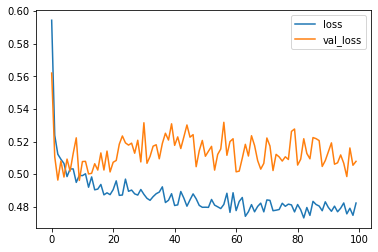

In [67]:
metrics[['loss', 'val_loss']].plot();

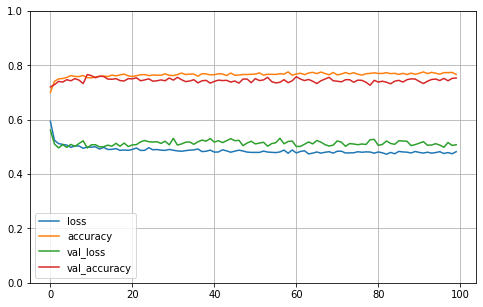

In [68]:

pd.DataFrame(modeltrain.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Evaluation Model

In [100]:
y_pred_s_1 = model.predict(X_val_final)

import numpy as np
y_pred_s_1 = np.where(y_pred_s_1 < 0.7, 0, 1).squeeze()
y_pred_s_1

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
print(classification_report(y_val, y_pred_s_1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       954
           1       0.55      0.55      0.55       312

    accuracy                           0.78      1266
   macro avg       0.70      0.70      0.70      1266
weighted avg       0.78      0.78      0.78      1266



Karena dalam dataset ini yang saya fokuskan adalah mengurangi FN, ketika saya ubah y_pred < 0.7 recallnya turun.

Dalam melakukan pelatihan model, saya telah mencoba mengubah-ubah fungsi aktivasi, weight initializer, batch normalization, optimizer dan menggunakan dropout. Tetapi dari sekian kali percobaan ini model yang terbaik yang saya buat dalam kasus ini, akan tetapi model ini berubah-ubah ketika dilakukan run ulang.

#### Model 2 sequential

In [71]:
# deklarasi model2
model2 = Sequential() 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)) #pipeline
train_dataset = train_dataset.shuffle(100).repeat(2).batch(30) #pipeline
model2.add(BatchNormalization()) #normalisasi sebelum masuk layer 
model2.add(Dense(16, activation='relu', input_shape=(19,), kernel_initializer=keras.initializers.HeUniform()))#input layer
model2.add(Dropout(0.2)) #dropout setelah masuk layer
model2.add(BatchNormalization()) #normalisasi sebelum masuk layer
model2.add(Dense(12, activation='relu', kernel_initializer=keras.initializers.HeUniform()))#hidden layer
model2.add(Dropout(0.2)) #dropout setelah masuk layer
model2.add(BatchNormalization()) #normalisasi sebelum masuk layer
model2.add(Dense(8, activation='relu', kernel_initializer=keras.initializers.HeUniform()))#hidden layer
model2.add(Dropout(0.2)) #dropout setelah masuk layer
model2.add(BatchNormalization()) #normalisasi sebelum masuk layer
model2.add(Dense(4, activation='relu', kernel_initializer=keras.initializers.HeUniform()))#hidden layer
model2.add(BatchNormalization()) #normalisasi sebelum masuk layer
model2.add(Dense(2, activation='relu', kernel_initializer=keras.initializers.HeUniform()))#hidden layer
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid')) #output layer

# training model2
model2.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

model2train = model2.fit(train_dataset, epochs=50, validation_data=(X_val_final, y_val),verbose=1)

Epoch 1/50
494/494 [==============================] - 6s 4ms/step - loss: 0.7421 - accuracy: 0.5521 - val_loss: 0.5405 - val_accuracy: 0.6904
Epoch 2/50
494/494 [==============================] - 2s 4ms/step - loss: 0.6768 - accuracy: 0.5790 - val_loss: 0.5556 - val_accuracy: 0.7346
Epoch 3/50
494/494 [==============================] - 2s 4ms/step - loss: 0.6658 - accuracy: 0.5955 - val_loss: 0.5705 - val_accuracy: 0.7520
Epoch 4/50
494/494 [==============================] - 2s 5ms/step - loss: 0.6584 - accuracy: 0.6143 - val_loss: 0.5713 - val_accuracy: 0.7622
Epoch 5/50
494/494 [==============================] - 2s 4ms/step - loss: 0.6541 - accuracy: 0.6236 - val_loss: 0.5745 - val_accuracy: 0.7725
Epoch 6/50
494/494 [==============================] - 2s 4ms/step - loss: 0.6516 - accuracy: 0.6297 - val_loss: 0.5780 - val_accuracy: 0.7646
Epoch 7/50
494/494 [==============================] - 2s 4ms/step - loss: 0.6492 - accuracy: 0.6272 - val_loss: 0.5770 - val_accuracy: 0.7662
Epoch 

In [72]:
metrics2 = pd.DataFrame(model2train.history)
metrics2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.742074,0.552081,0.540547,0.690363
1,0.676819,0.579033,0.555594,0.734597
2,0.665753,0.595515,0.570475,0.751975
3,0.658409,0.614293,0.571341,0.762243
4,0.654062,0.623615,0.574498,0.772512


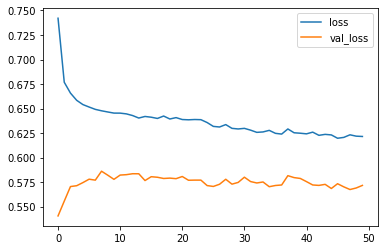

In [73]:
metrics2[['loss', 'val_loss']].plot();

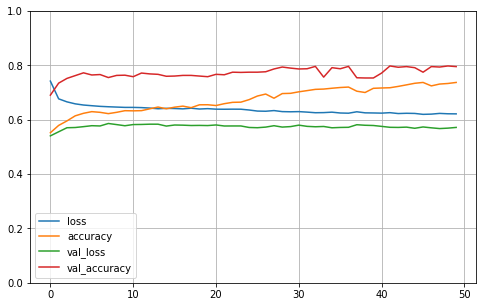

In [74]:
pd.DataFrame(model2train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Model Evaluation

In [75]:
#predict
y_pred_s_2 = model2.predict(X_val_final)

#
y_pred_s_2 = np.where(y_pred_s_2 < 0.5, 0, 1).squeeze()

#evaluasi model classification report
print(classification_report(y_val, y_pred_s_2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       954
           1       0.62      0.43      0.51       312

    accuracy                           0.80      1266
   macro avg       0.73      0.67      0.69      1266
weighted avg       0.78      0.80      0.78      1266



Awalnya model kedua ini memiliki performa lebih baik dari model pertama, setelah dimasukan pipeline model ini menjadi turun performanya.

## Functional API

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# Model Arsitektur
data_in = Input(shape=(39,))
h1 = Dense(12, activation='relu', kernel_initializer=keras.initializers.HeUniform())(data_in)
output_layer = Dense(1, activation='sigmoid')(h1)

# Deklarasi Model
model_f = Model(inputs=data_in, outputs=output_layer)

In [77]:
model_f.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_f_train = model.fit(X_train_final, y_train, epochs=50, validation_data=(X_val_final, y_val))

Epoch 1/50
232/232 [==============================] - 1s 4ms/step - loss: 0.4487 - accuracy: 0.7917 - val_loss: 0.5058 - val_accuracy: 0.7457
Epoch 2/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.7983 - val_loss: 0.5013 - val_accuracy: 0.7520
Epoch 3/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.7911 - val_loss: 0.5128 - val_accuracy: 0.7457
Epoch 4/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.7961 - val_loss: 0.5103 - val_accuracy: 0.7464
Epoch 5/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7906 - val_loss: 0.5177 - val_accuracy: 0.7457
Epoch 6/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.7936 - val_loss: 0.5051 - val_accuracy: 0.7520
Epoch 7/50
232/232 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.7944 - val_loss: 0.5040 - val_accuracy: 0.7512
Epoch 

In [78]:
metrics_f = pd.DataFrame(model_f_train.history)
metrics_f.head()

,loss,accuracy,val_loss,val_accuracy
0,0.448728,0.791678,0.505787,0.745656
1,0.441400,0.798298,0.501273,0.751975
2,0.444501,0.791138,0.512809,0.745656
3,0.436747,0.796136,0.510276,0.746445
4,0.441612,0.790597,0.517688,0.745656


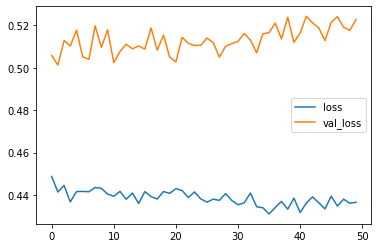

In [79]:
metrics_f[['loss', 'val_loss']].plot();

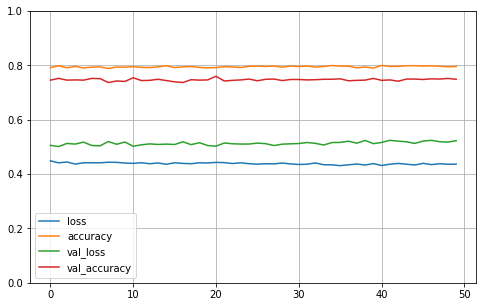

In [80]:
pd.DataFrame(model_f_train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Evaluation Model

In [81]:
#predict
y_pred_f = model_f.predict(X_val_final)

#
y_pred_f = np.where(y_pred_f < 0.4, 0, 1).squeeze()

#evaluasi model classification report
print(classification_report(y_val, y_pred_f))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57       954
           1       0.27      0.63      0.38       312

    accuracy                           0.49      1266
   macro avg       0.53      0.54      0.47      1266
weighted avg       0.66      0.49      0.52      1266



Saya tidak melakukan optimisasi pada model ini, karna saya merasa lebih nyaman menggunakan Sequential API dalam melakukan optimisasi (mencoba-coba model).

# Model Inference

In [82]:
inf_final = preprocessor.transform(inf)

In [83]:
y_pred_inf = model.predict(inf_final)
y_pred_inf = np.where(y_pred_inf < 0.5, 'No', 'Yes').squeeze()
prediction = pd.DataFrame(y_pred_inf, columns=['Prediction'])
result_prediction = pd.concat([inf,prediction], axis=1)
result_prediction

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,Prediction
0,4782-OSFXZ,Female,Yes,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),82.70,5831.20,No,No
1,9048-JVYVF,Male,No,No,No,3,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes,Yes
2,9787-XVQIU,Male,No,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.30,75.30,Yes,Yes
3,7967-HYCDE,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40,No,Yes
4,9330-VOFSZ,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,No,No
5,8809-XKHMD,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),100.55,7325.10,No,No
6,1376-HHBDV,Female,No,No,No,30,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,48.80,1536.75,No,No
7,9565-DJPIB,Female,No,No,Yes,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Mailed check,89.60,365.65,Yes,Yes
8,3999-WRNGR,Female,No,Yes,Yes,60,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.75,3069.45,No,No
9,4749-OJKQU,Female,No,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.65,302.35,No,Yes


# Save Model

In [85]:
import pickle

In [86]:
with open('preprocessor.pkl', 'wb') as prep_model:
    pickle.dump(preprocessor, prep_model)

In [87]:
with open('prep.pkl', 'wb') as prep_model:
    pickle.dump(preprocessor, prep_model)

In [88]:
model.save("model.h5")

In [89]:
X_train.head(2)

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
1244,Yes,Yes,No,23,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.45,2117.25
406,No,Yes,Yes,60,Fiber optic,Yes,No,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),95.40,5812.00


In [90]:
print(X_train.paymentmethod.unique())

['Electronic check' 'Bank transfer (automatic)' 'Mailed check'
 'Credit card (automatic)']


# Conclussion

## EDA

Menurut saya, jika ditarik kesimpulan bahwa para pelanggan yang masih baru menggunakan layanan dari perusahaan tersebut cenderung melakukan churn, artinya perusahaan harus memberikan layanan yang terbaik kepada para pelanggan baru. Kenapa saya menarik kesimpulan bahwa yang melakukan churn adalah pelanggan-pelanggan baru, karna pelanggan-pelanggan tersebut hanya memiliki contract month-to-mont artinya jangka pendek, menggunakan electronic check yang artinya hanya melakukan pembayaran ketika ada tagihan tidak seperti pelanggan yang menggunakan automatic payment.

Saya menyimpulkan bahwa pelanggan-pelanggan yang menggunakan banyak layanan cenderung akan bertahan berlangganan dibandingkan dengan pelanggan yang hanya berlangganan satu produk saja. Itu dikarenakan mereka masih mencoba-coba layanan dari perusahaan tersebut, sedangkan yang telah menggunakan banyaklayanan bertahan lama karena sudah merasa puas dengan layanan-layanan perusahaan tersebut.

Dari kesimpulan-kesimpulan sebelumnya argumen tersebut bisa divalidasi dari melihat hasil plot tenure, bahwa yang melakukan churn memang kebanyakan dari mereka yang baru berlangganan.

Jadi kesimpulan analisis ini bahwa perusahaan harus memberikan layanan sebaik-baiknya terhadap para pelanggan baru. Agar mereka merasa puas dengan layanan produknya sehingga mereka akan menjadi pelanggan loyal pada perusahaan tersebut.

## Model

Pada mulanya menggunakan base model, hasi model tersebut Vanishing Gradient, lalu saya melakukan optimisasi dengan beberapa kali percobaan menambah dan mengurangi layer, mengubah-ubah fungsi aktivasi, mengubah-ubah weight initializer, menggunakan batch normalization. Karna saya merasa model tersebut juga exploding saya coba ubah-ubah gradient clipping, mengubah-ubah optimizer dan sempet mencoba menggunakan dropout. Tetapi hasil yang terbaik adalah pada model sequential dengan 3 hidden layer menggunakan activation 'relu', weight initializer 'GlorotUniform', menggunakan batch normalization dan optimizer 'adam'. Dikarenakan dataset kecil maka hasilnya jadi tidak konsisten.